<a href="https://colab.research.google.com/github/viviennejuma/Supervised-Unsupervised-with-R/blob/main/R_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("ggthemes")
install.packages("funModeling")
install.packages("Hmisc")
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Importing Libraries
library(dplyr) # Data manipulation
library(data.table)
library(tidyverse)
library(ggplot2) # Data visualization
library(ggthemes) # Plot themes
library(DataExplorer)
library(funModeling) 
library(tidyverse) 
library(Hmisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()          masks stats::lag()
✖ data.table::last()    masks dplyr::last()
✖ purrr::transpose()    masks data.table::transpose()

Loadin

In [3]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/IPAdvertisingData
# ---
#

library("data.table")
ads <- fread('http://bit.ly/IPAdvertisingData')

In [4]:

# Determining the no. of records in our dataset
#
dim(ads) # 1000 records 10 columns

[1] 1000   10

In [5]:

# Checking whether each column has an appropriate datatype
#
#Datatypes
sapply(ads, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "integer"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Male
[1] "integer"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "integer"

In [6]:
# previewing the column names
colnames(ads)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

# 4. External Data Source Validation
Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

#### a.Validation

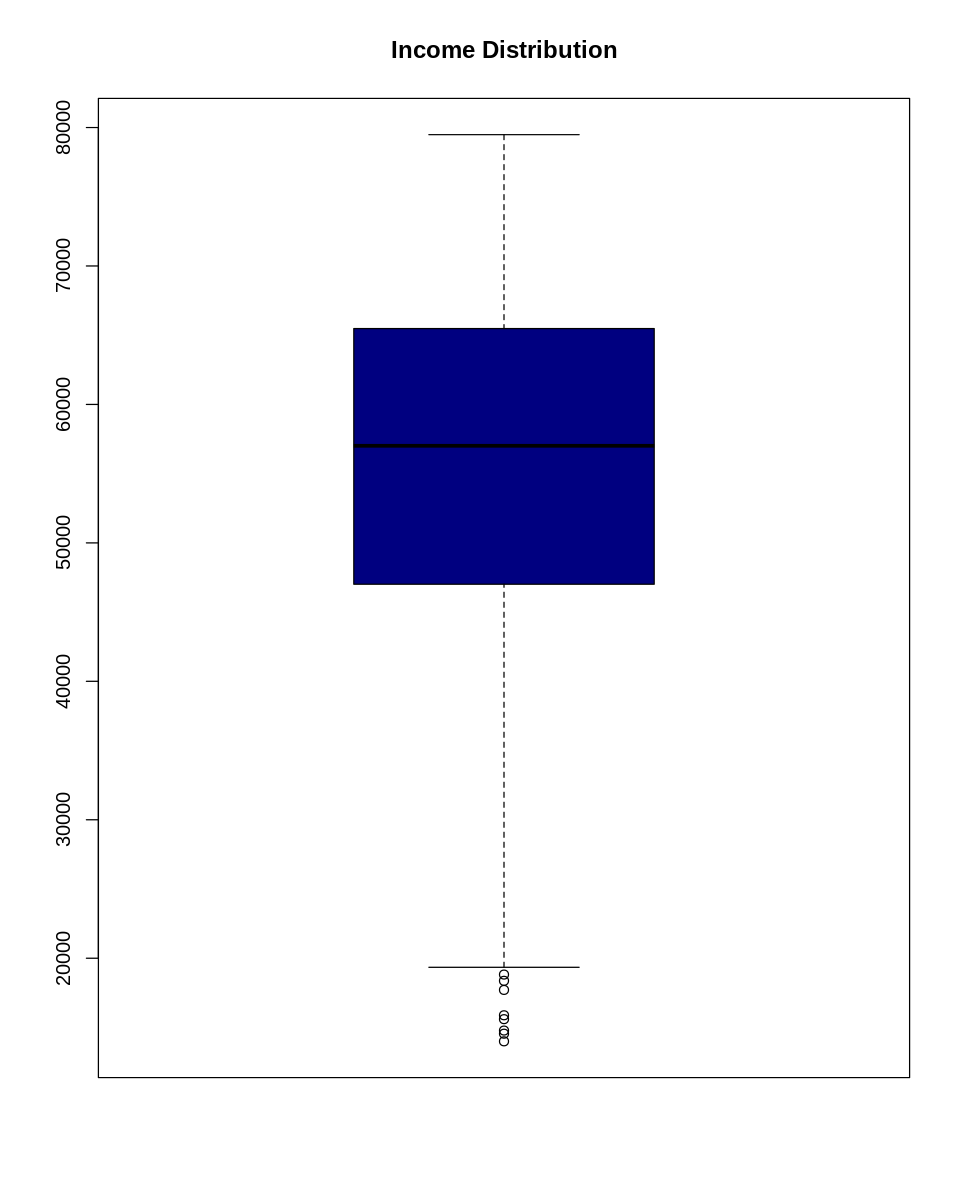

In [7]:

# Checking for Outliers
# Then use the function boxplot.stats which lists the outliers in the vectors
# ---
#
options(repr.plot.width = 8, repr.plot.height = 10)
boxplot(ads$`Area Income`,
        col = "navyblue")
# Add a title
title("Income Distribution")

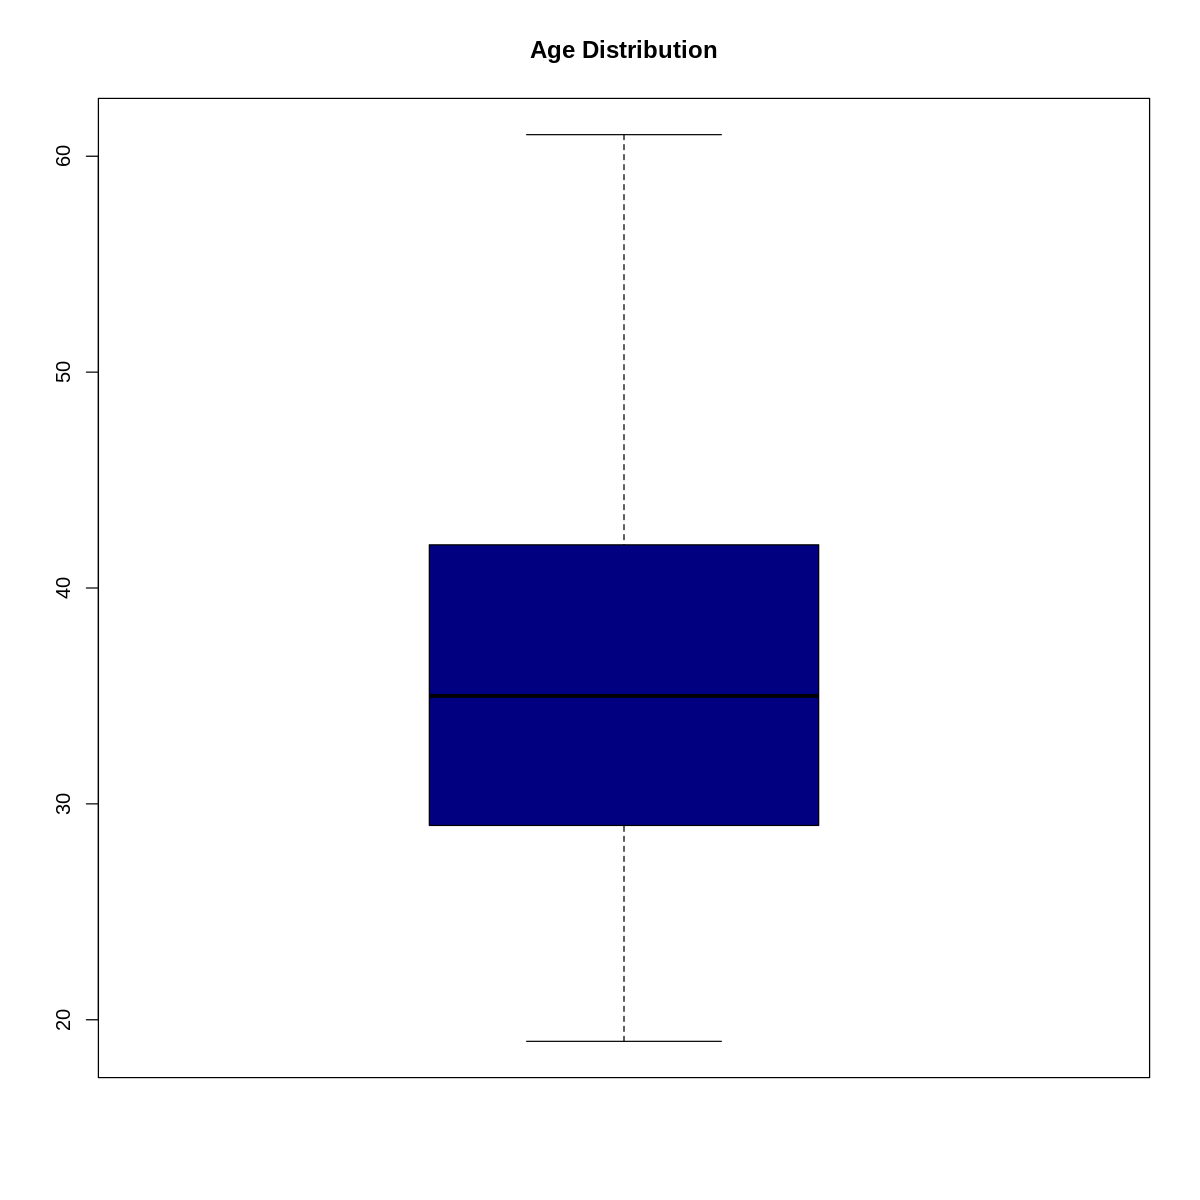

In [8]:
# Outliers in Age
options(repr.plot.width = 10, repr.plot.height = 10)
boxplot(ads$Age,
        col = "navyblue")
# Add a title
title("Age Distribution")

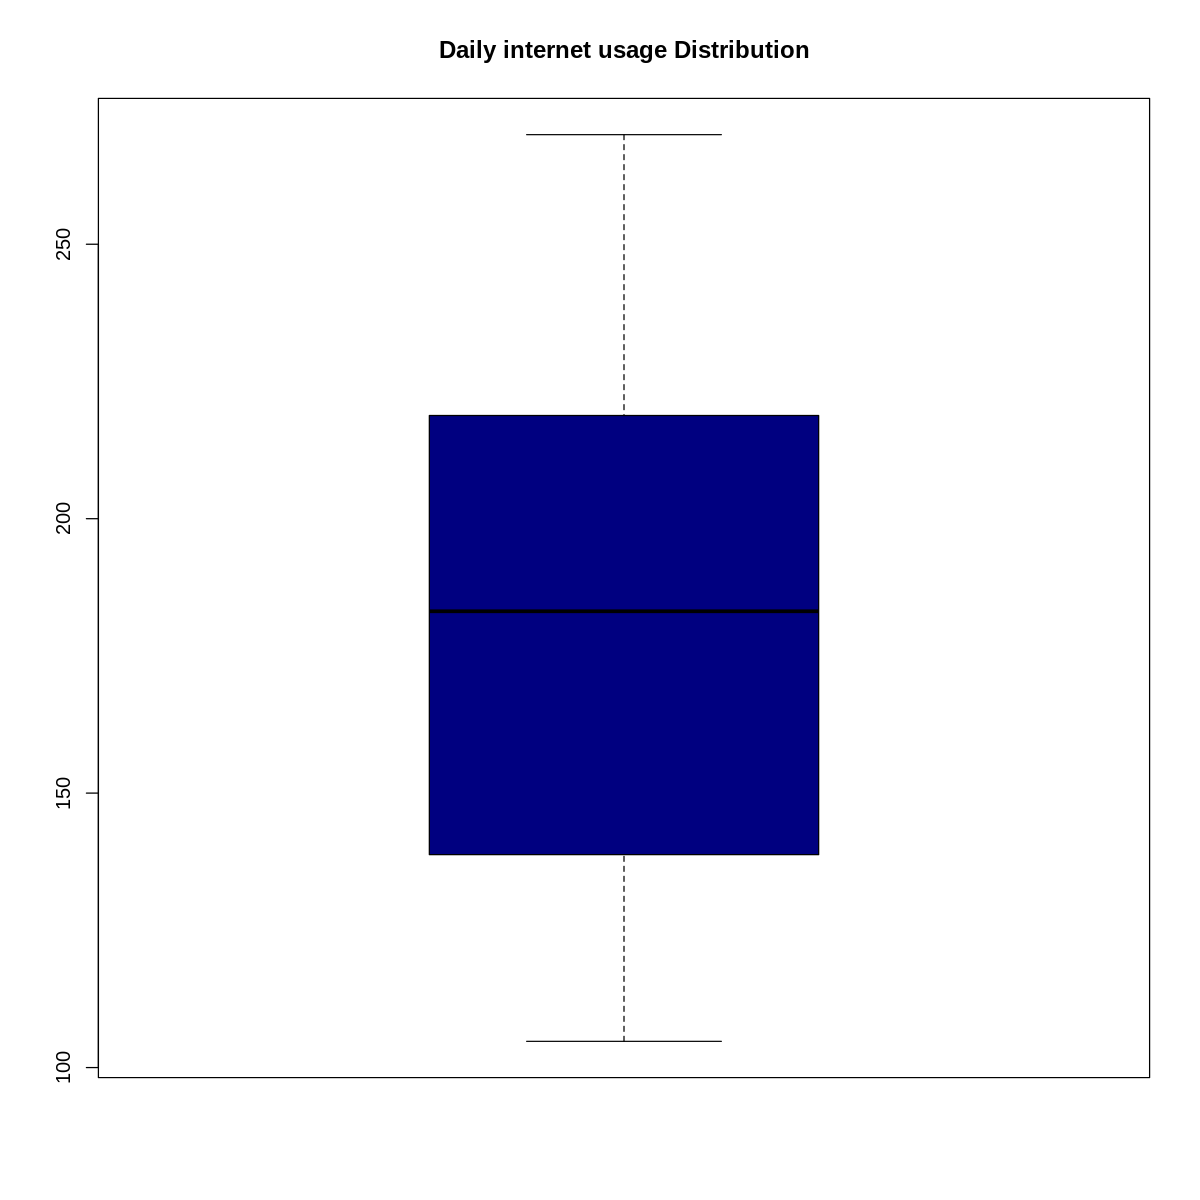

In [9]:
# Daily internet usage
options(repr.plot.width = 10, repr.plot.height = 10)
boxplot(ads$`Daily Internet Usage`, col = 'navyblue')
# Add a title
title("Daily internet usage Distribution")

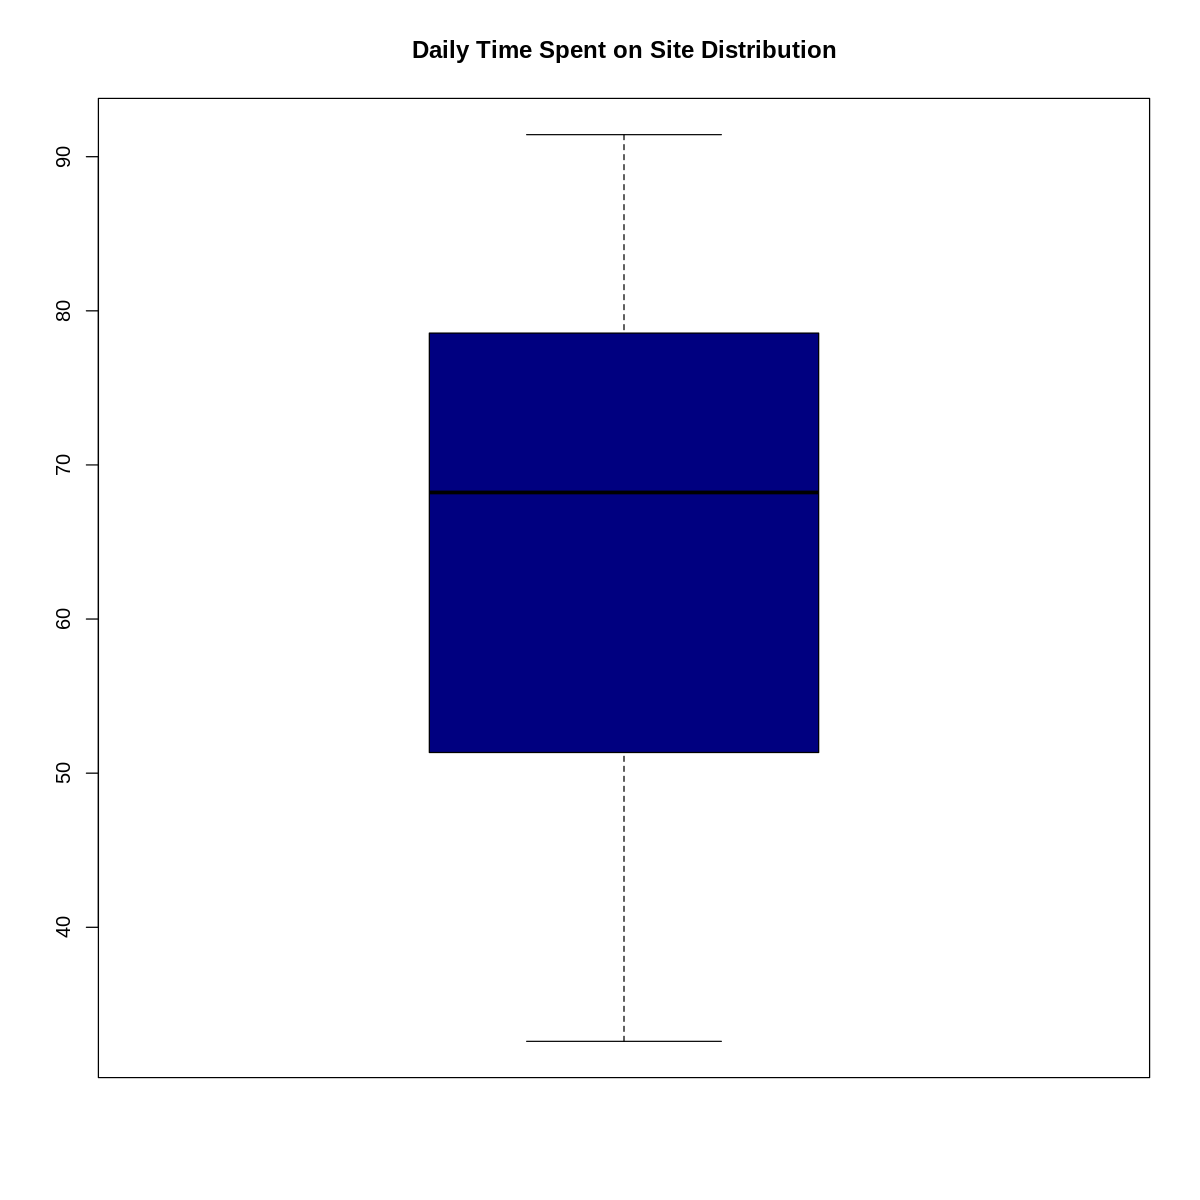

In [10]:
# Daily Time Spent on site
options(repr.plot.width = 10, repr.plot.height = 10)
boxplot(ads$`Daily Time Spent on Site`, col = 'navyblue')
# Add a title
title("Daily Time Spent on Site Distribution")

In [11]:
# Identifying the Missing Data
#
sum(is.na(ads))  

# There are no missing values.

[1] 0

In [12]:

# Checking for Duplicate data
#

sum(ads %>% duplicated())

# There are no duplicates in the dataset

[1] 0


6. Exploratory Analysis
 bivariate, univariate and bivariate summaries and recording our observations

In [13]:

# Renaming Male to Gender and changing the data type

colnames(ads)[colnames(ads) == 'Male'] = 'Gender'

In [14]:
#Change datattypes
ads$Gender <- as.factor(ads$Gender)
ads$`Clicked on Ad` <- as.factor(ads$`Clicked on Ad`)
#Checking datatypes
sapply(ads, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "integer"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Gender
[1] "factor"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "factor"

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
0,519,51.9,51.9
1,481,48.1,100.0


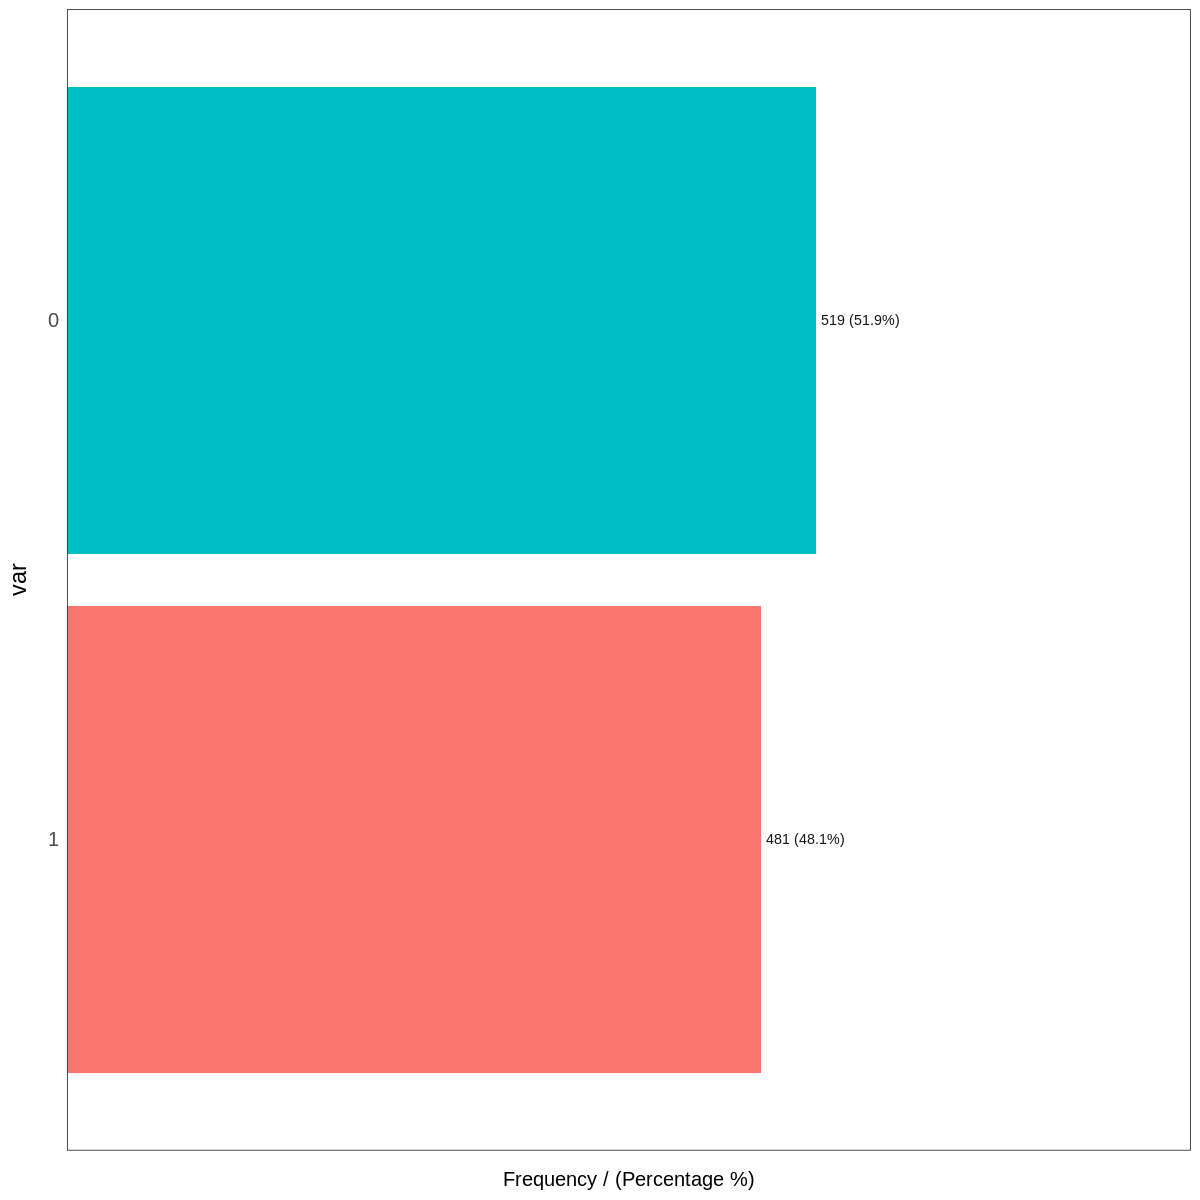

In [15]:

# Checking on Gender distribution
#
freq(ads$Gender)

#  We have 0 as 51.9% and 1 as 48.1% assuming 0 is female and 1 is male
#  Means that more women visit the blog.

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
0,500,50,50
1,500,50,100


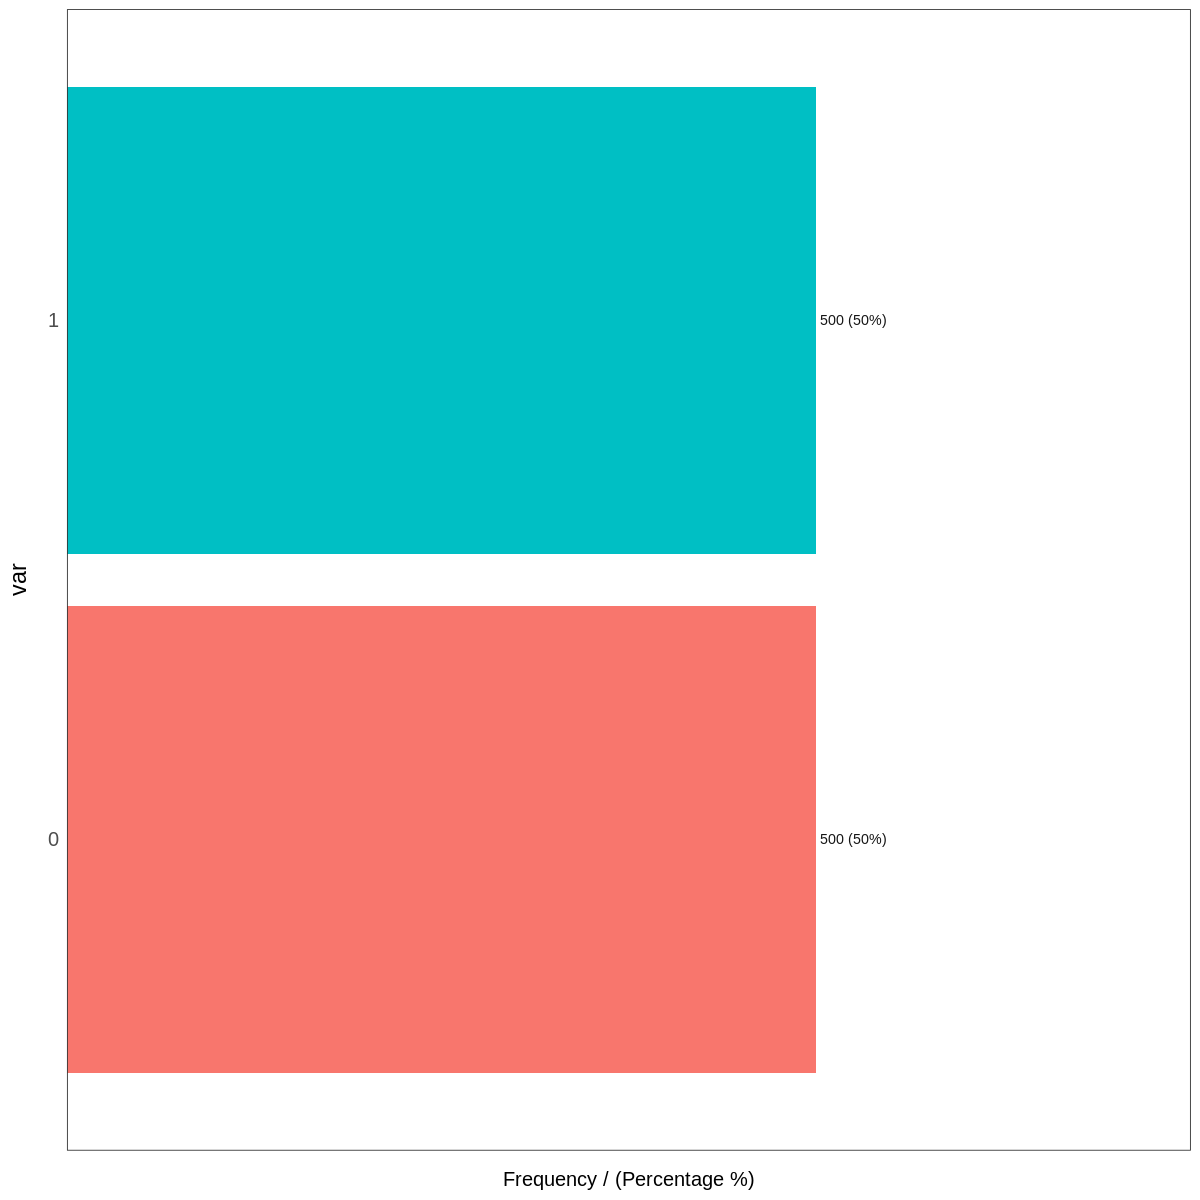

In [16]:
# Checking on Clicked Ads distribution
#
freq(ads$`Clicked on Ad`)

#  We have equal distribution of clicked and non-clicked ads.

In [17]:
# Grouping by Gender and Clicked ads to see the distribution.
g1 <- ads %>% group_by(Gender, `Clicked on Ad`)
g1 %>% summarise(n = n())

`summarise()` has grouped output by 'Gender'. You can override using the `.groups` argument.



Gender,Clicked on Ad,n
<fct>,<fct>,<int>
0,0,250
0,1,269
1,0,250
1,1,231


In [18]:
colnames(ads)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Gender"                   "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [19]:
# Measures of Central tendency
# describe from Hmisc package.
#Selecting the numeric columns
numerical <- subset(ads, select = c("Daily Time Spent on Site", "Age", 'Area Income',"Daily Internet Usage"))

summary(numerical)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       

In [20]:
# describe from Hmisc package.
library(Hmisc)
describe(numerical)

numerical 

 4  Variables      1000  Observations
--------------------------------------------------------------------------------
Daily Time Spent on Site 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0      900        1       65    18.11    37.58    41.34 
     .25      .50      .75      .90      .95 
   51.36    68.22    78.55    83.89    86.20 

lowest : 32.60 32.84 32.91 32.99 33.21, highest: 90.97 91.10 91.15 91.37 91.43
--------------------------------------------------------------------------------
Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0       43    0.999    36.01    9.943    23.95    26.00 
     .25      .50      .75      .90      .95 
   29.00    35.00    42.00    49.00    52.00 

lowest : 19 20 21 22 23, highest: 57 58 59 60 61
--------------------------------------------------------------------------------
Area Income 
       n  missing distinct     Info     Mean      Gmd    

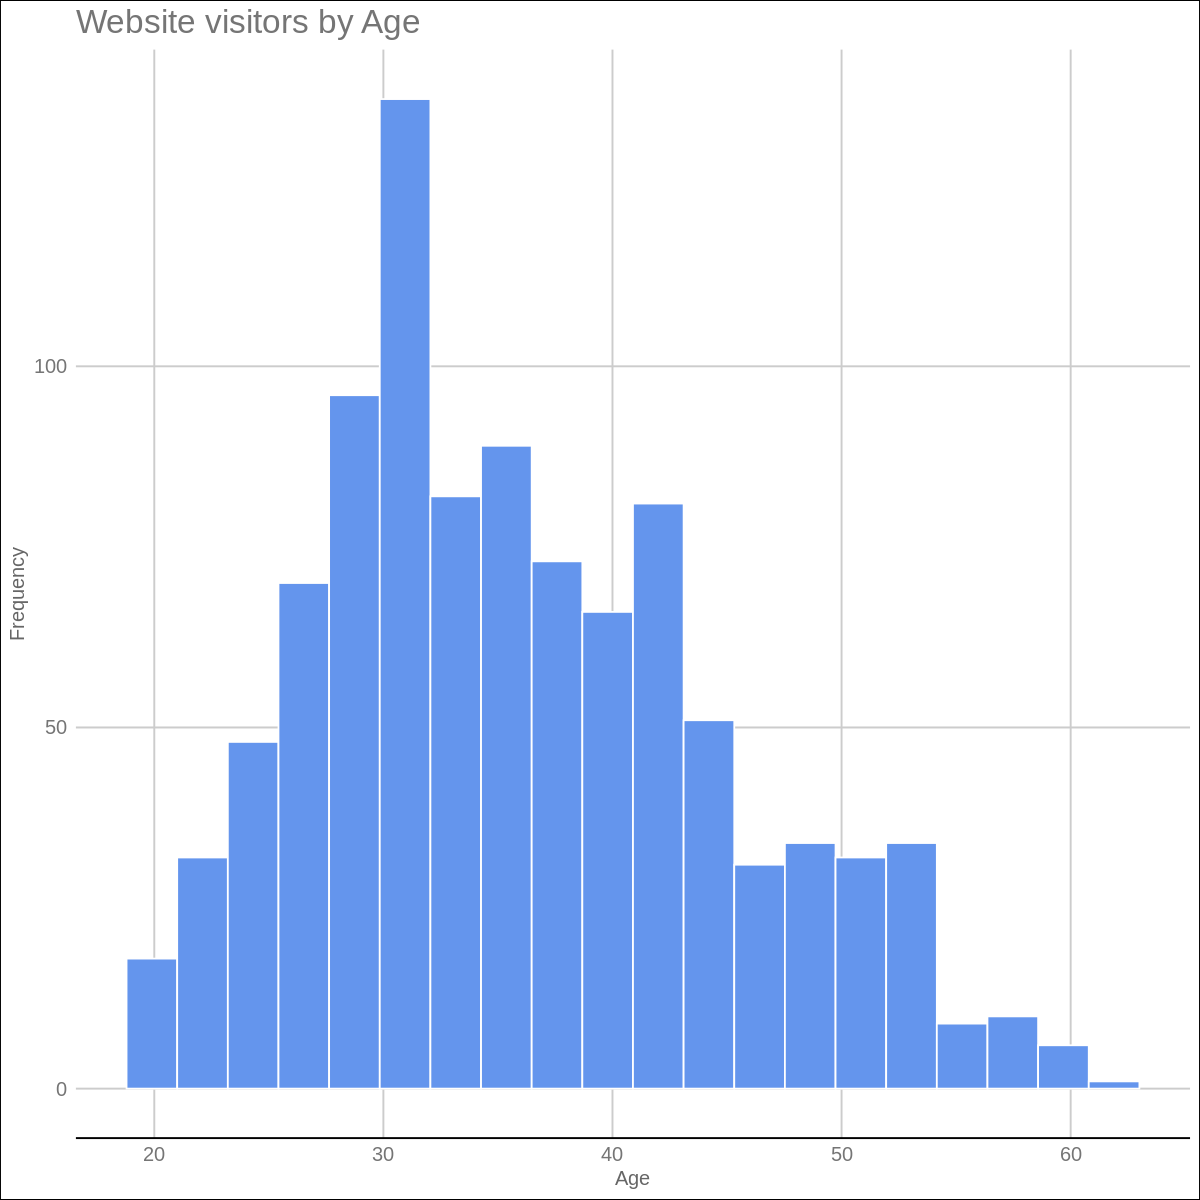

In [21]:
# Histogram for age distribution

library(ggplot2)                                     # for visualization
ggplot(ads, aes(x = Age)) +
  geom_histogram(fill = "cornflowerblue", 
                 color = "white",bins = 20) + 
  theme_gdocs() +                                  # use a minimal theme
  labs(title="Website visitors by Age",
       x = "Age", y = "Frequency")

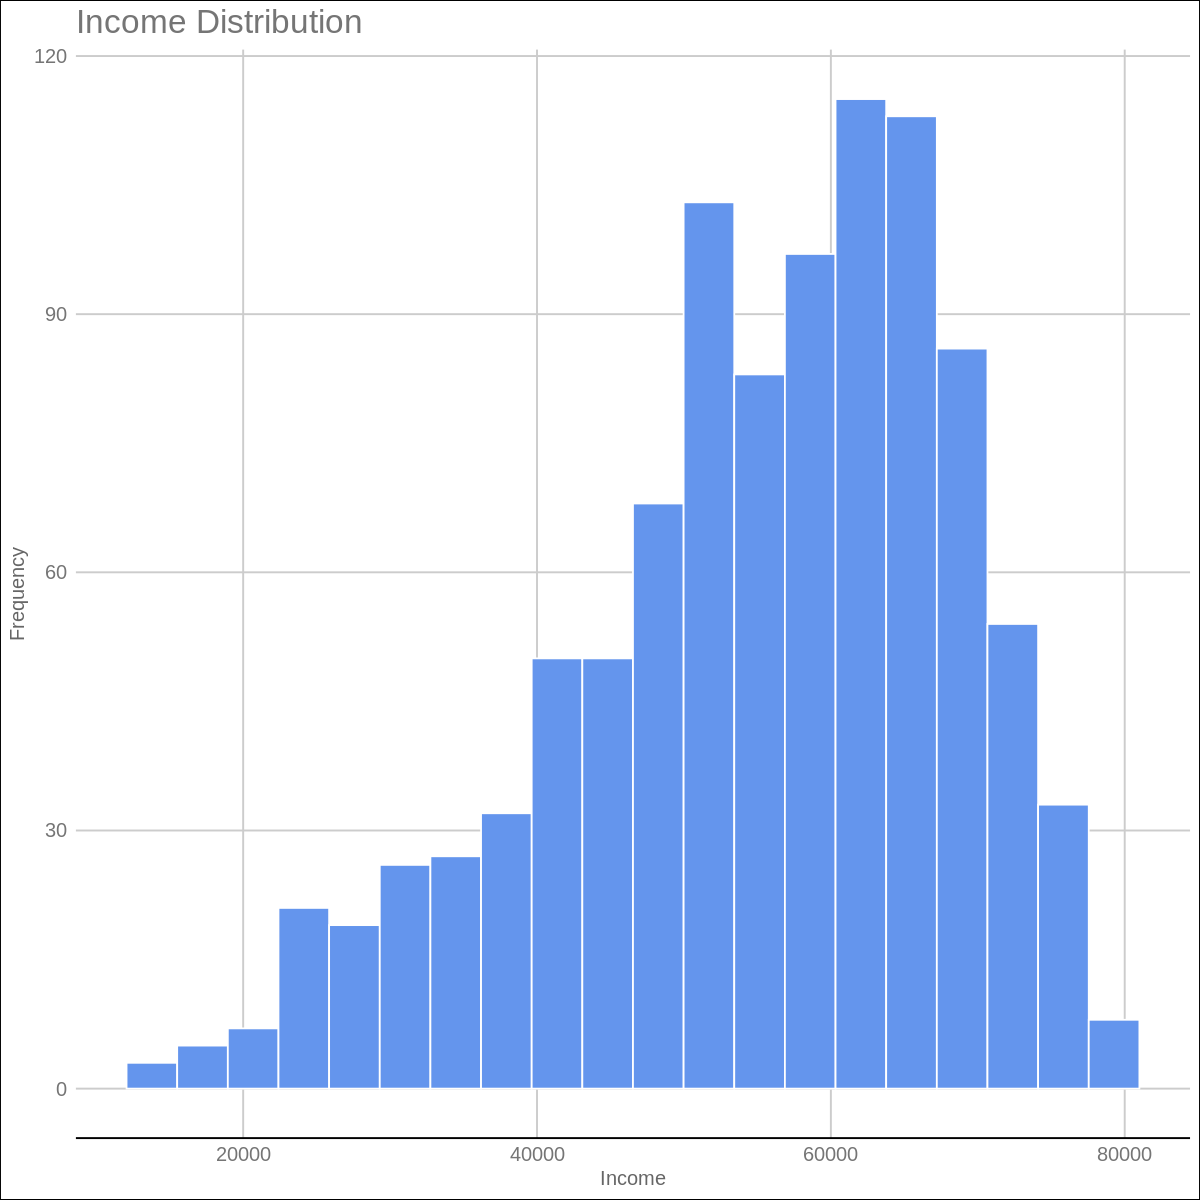

In [22]:

# Histogram for Income distribution

library(ggplot2)                                     # for visualization
ggplot(ads, aes(x = `Area Income` )) +
  geom_histogram(fill = "cornflowerblue", 
                 color = "white",bins = 20) + 
  theme_gdocs() +                                  # use a minimal theme
  labs(title="Income Distribution",
       x = "Income", y = "Frequency")

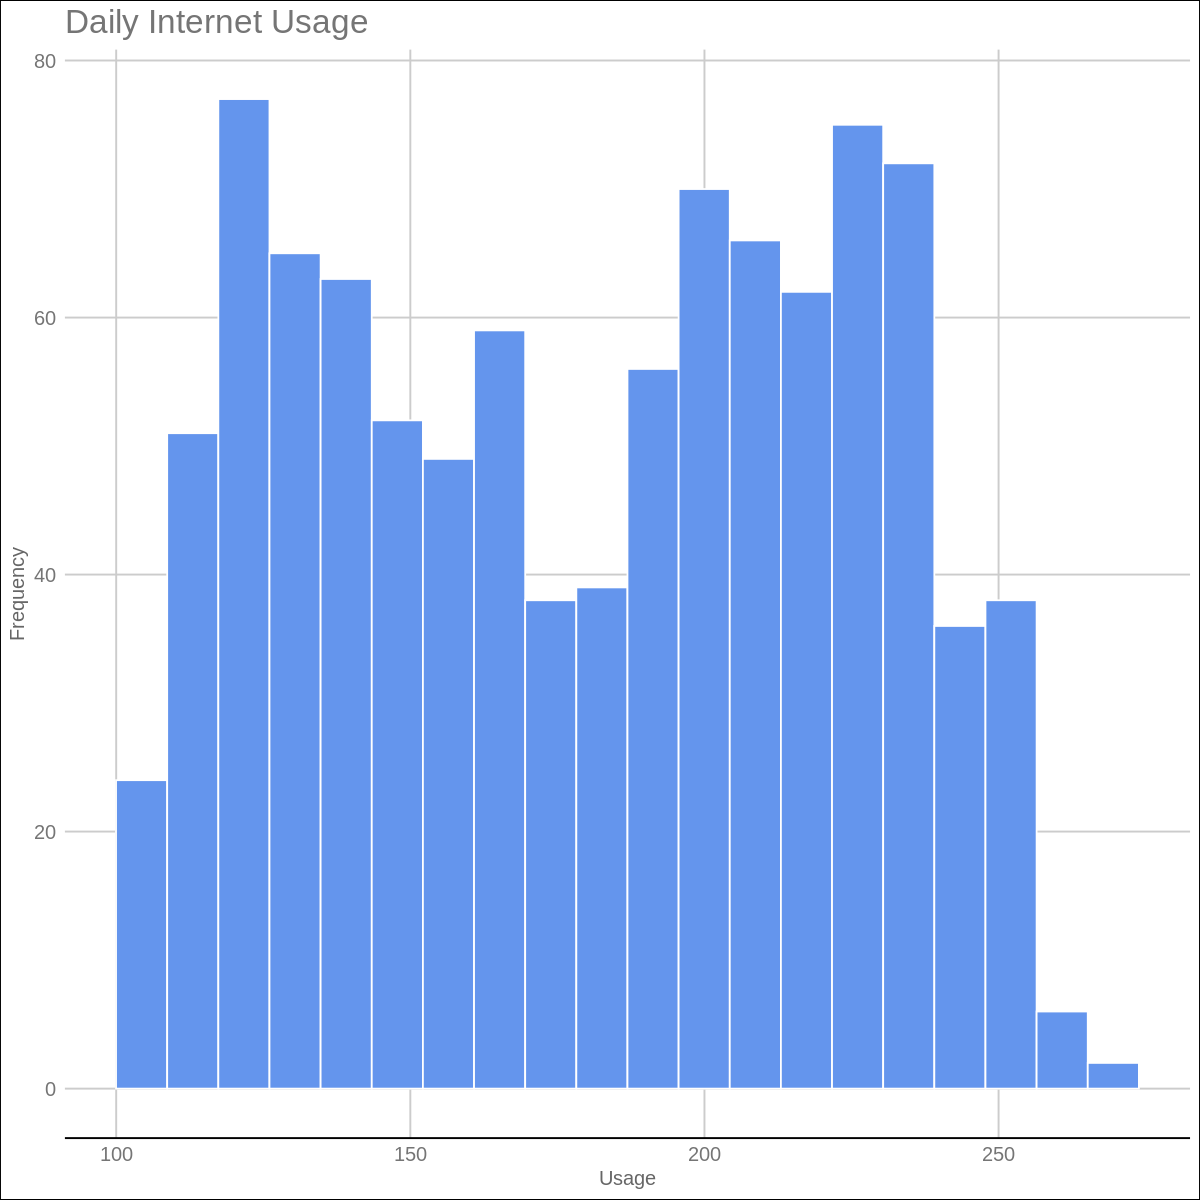

In [23]:

# Histogram for Daily time spent on site

library(ggplot2)                                     # for visualization
ggplot(ads, aes(x = `Daily Internet Usage` )) +
  geom_histogram(fill = "cornflowerblue", 
                 color = "white",bins = 20) + 
  theme_gdocs() +                                  # use a minimal theme
  labs(title="Daily Internet Usage",
       x = "Usage", y = "Frequency")

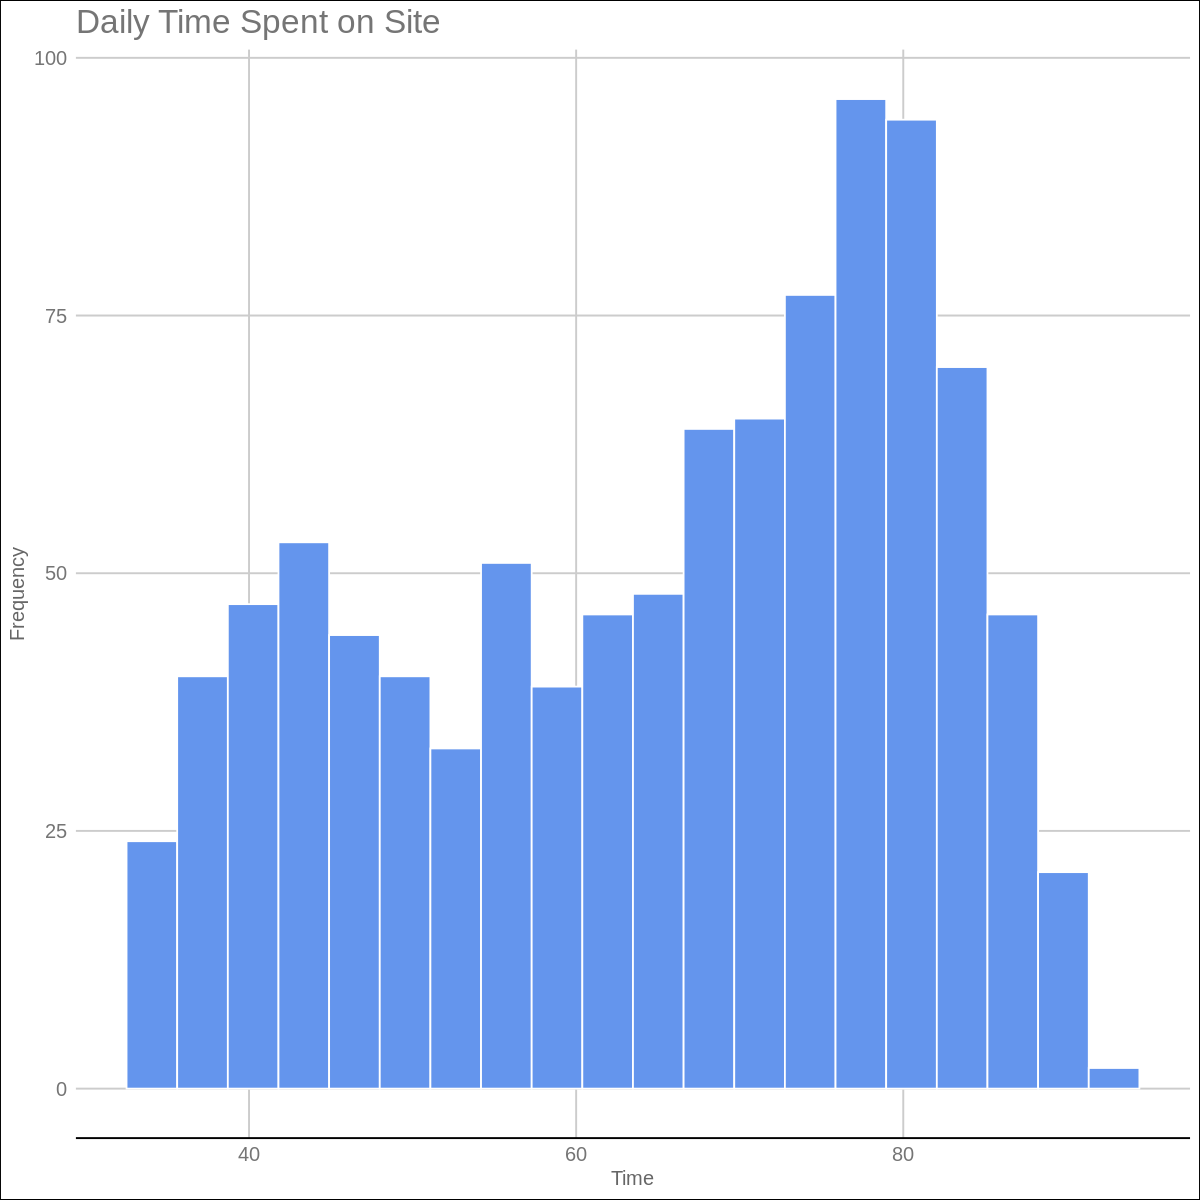

In [24]:
# Histogram for Daily time spent on site

library(ggplot2)                                     # for visualization
ggplot(ads, aes(x = `Daily Time Spent on Site` )) +
  geom_histogram(fill = "cornflowerblue", 
                 color = "white",bins = 20) + 
  theme_gdocs() +                                  # use a minimal theme
  labs(title="Daily Time Spent on Site",
       x = "Time", y = "Frequency")

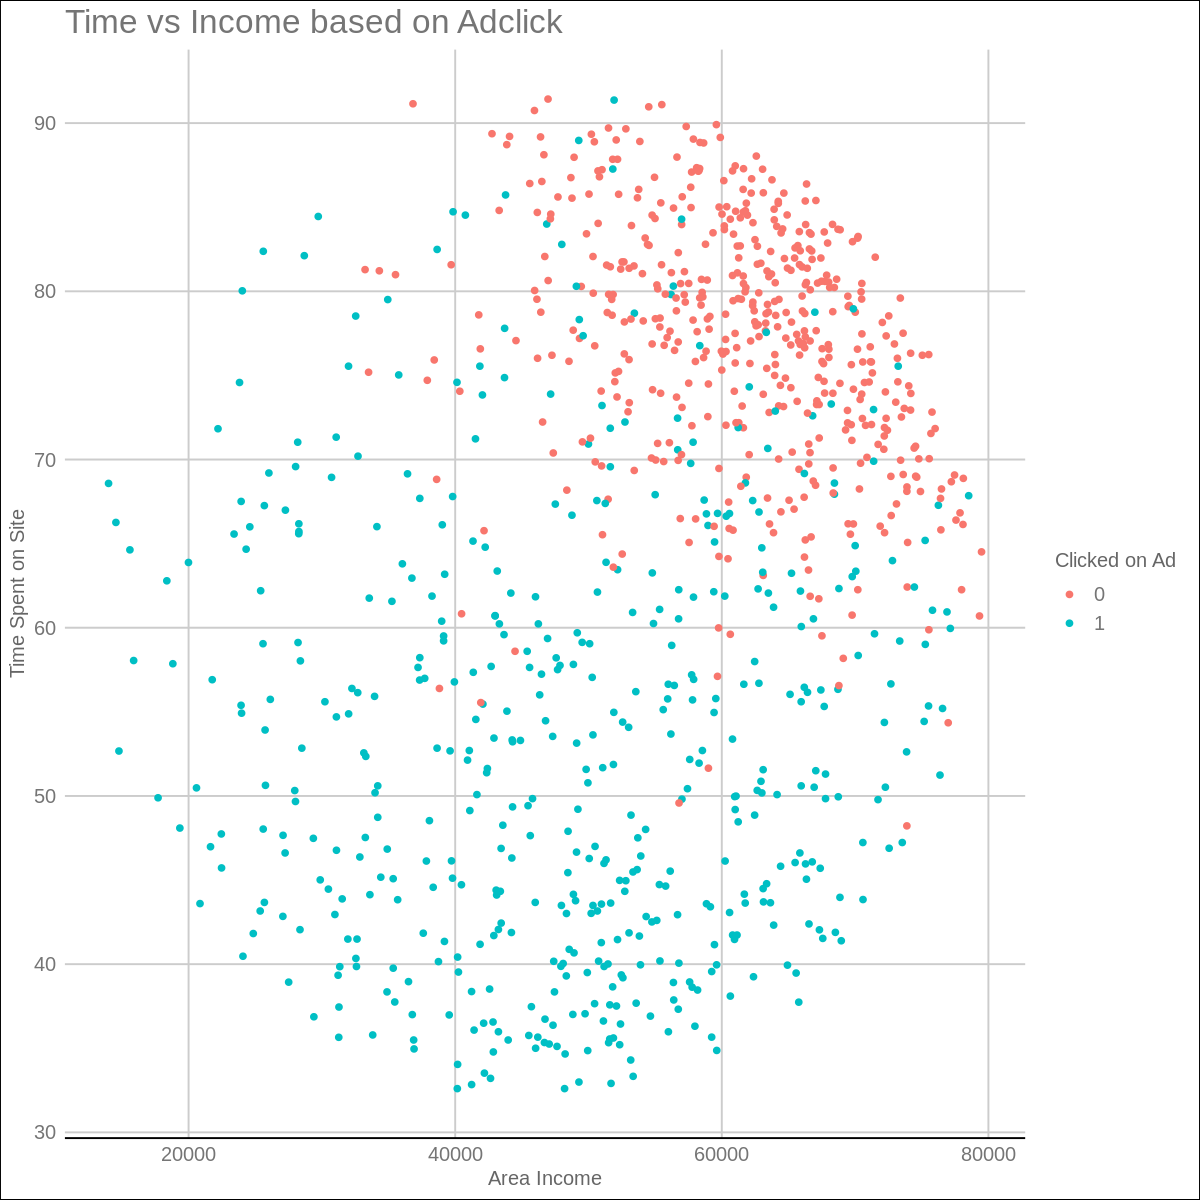

In [25]:
# Scatter Plot for Time vs Income based on adclicks


options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = ads, mapping = aes(`Area Income` , `Daily Time Spent on Site`)) +
    geom_point(alpha = 10, aes(color = `Clicked on Ad`)) + theme_gdocs() +
     labs(title = "Time vs Income based on Adclick",
     x = "Area Income", y = "Time Spent on Site")

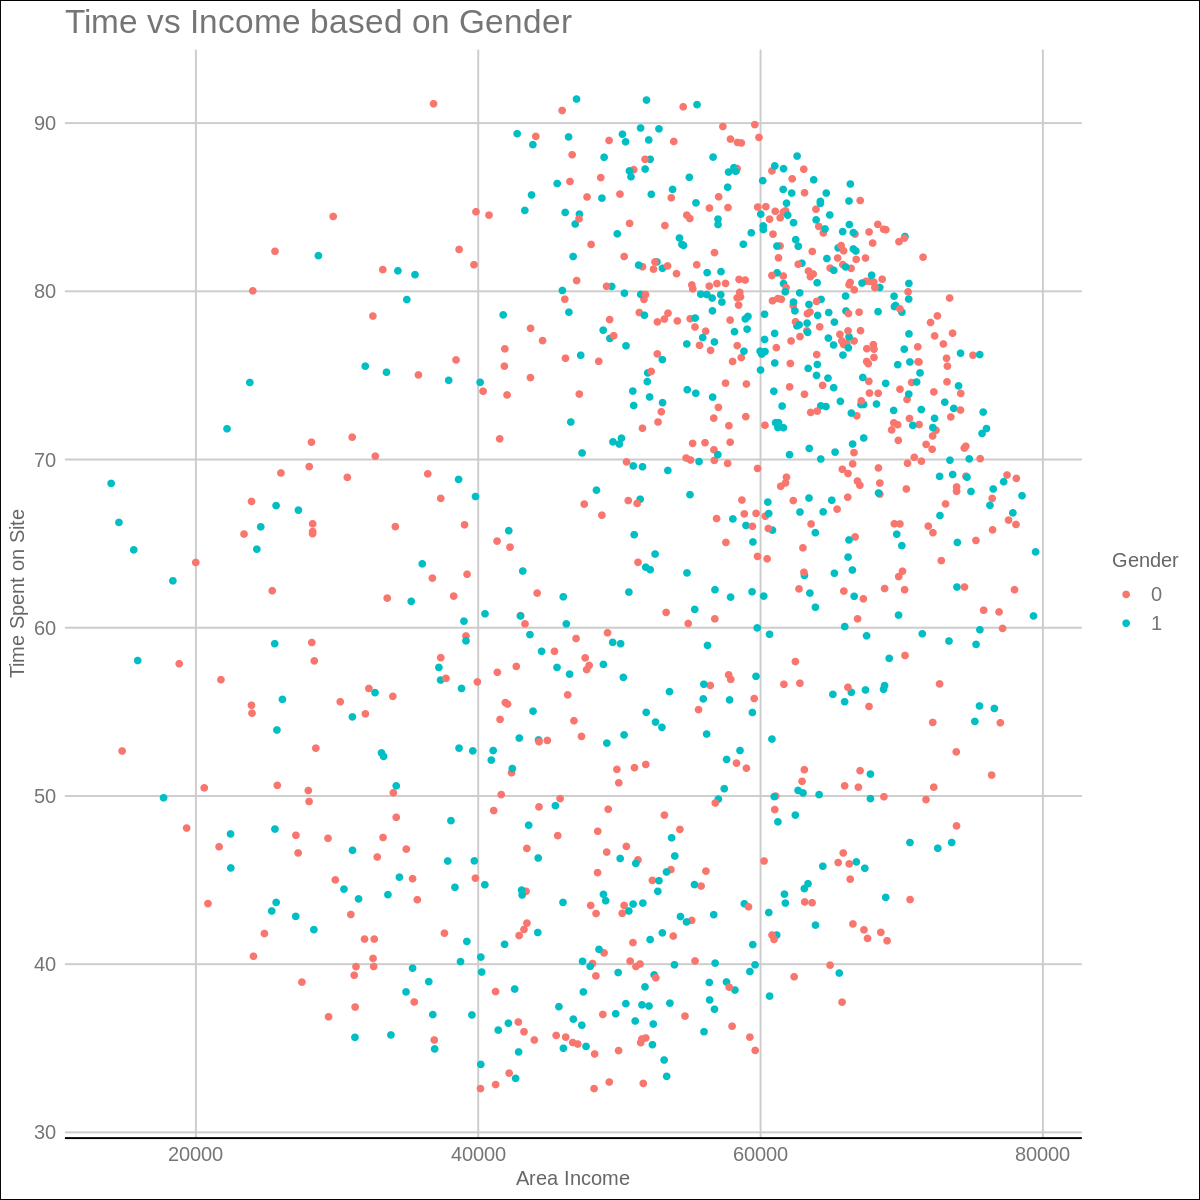

In [26]:
# Scatter Plot for Time vs Income based on Gender


options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = ads, mapping = aes(`Area Income` , `Daily Time Spent on Site`)) +
    geom_point(alpha = 10, aes(color = Gender)) + theme_gdocs() +
     labs(title = "Time vs Income based on Gender",
     x = "Area Income", y = "Time Spent on Site")

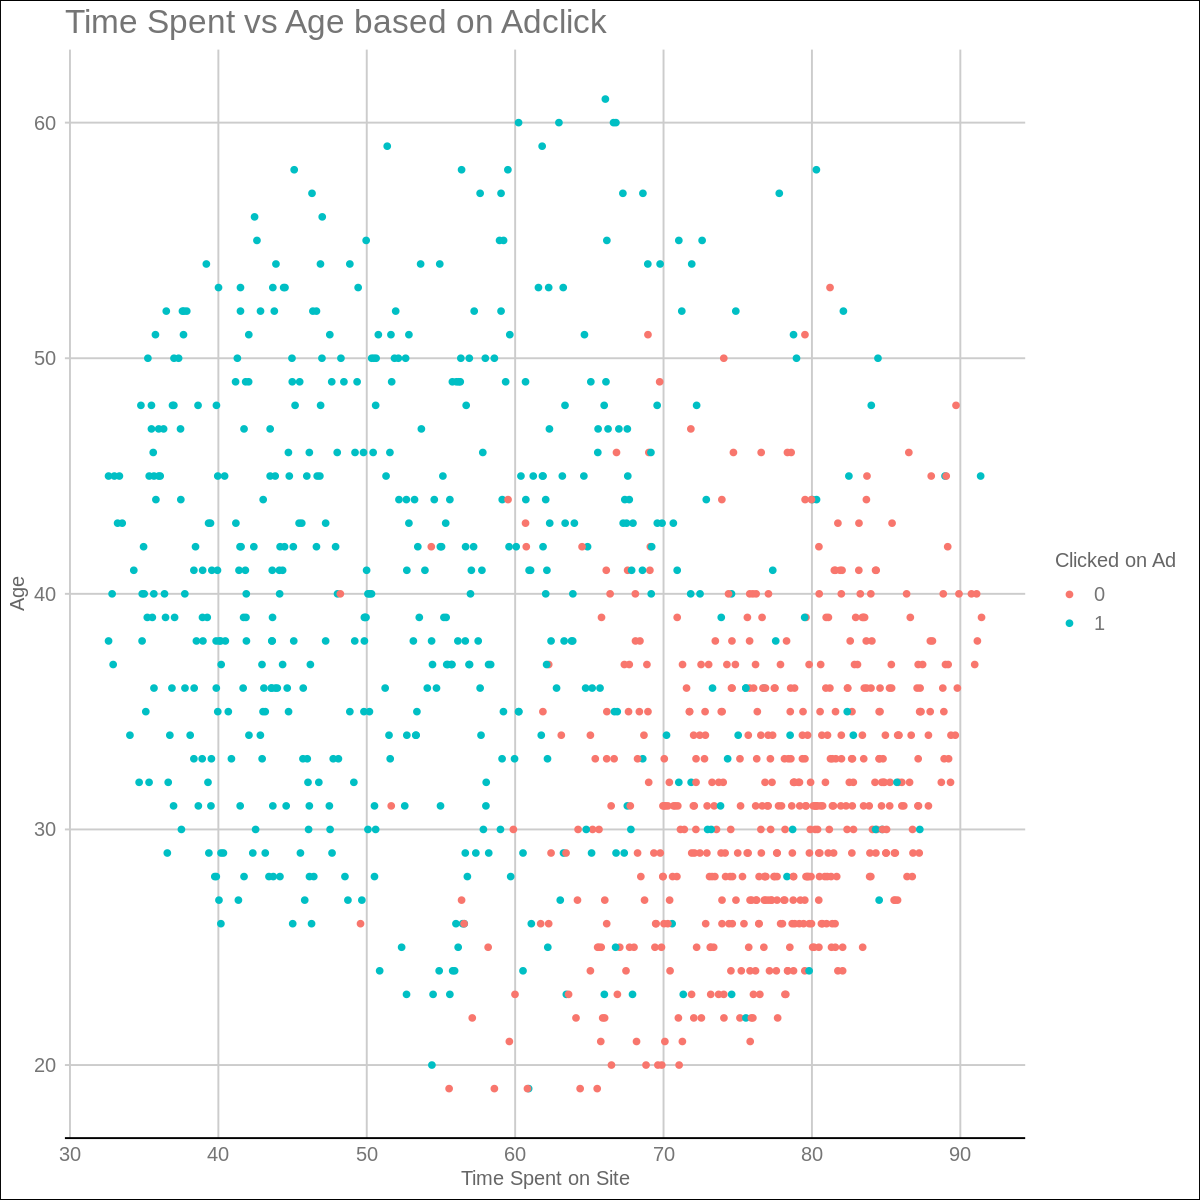

In [27]:
# Scatter Plot for Time vs Income based on adclicks


options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(data = ads, mapping = aes( `Daily Time Spent on Site`, Age)) +
    geom_point(alpha = 10, aes(color = `Clicked on Ad`)) + theme_gdocs() +
     labs(title = "Time Spent vs Age based on Adclick",
     x = "Time Spent on Site", y = "Age")

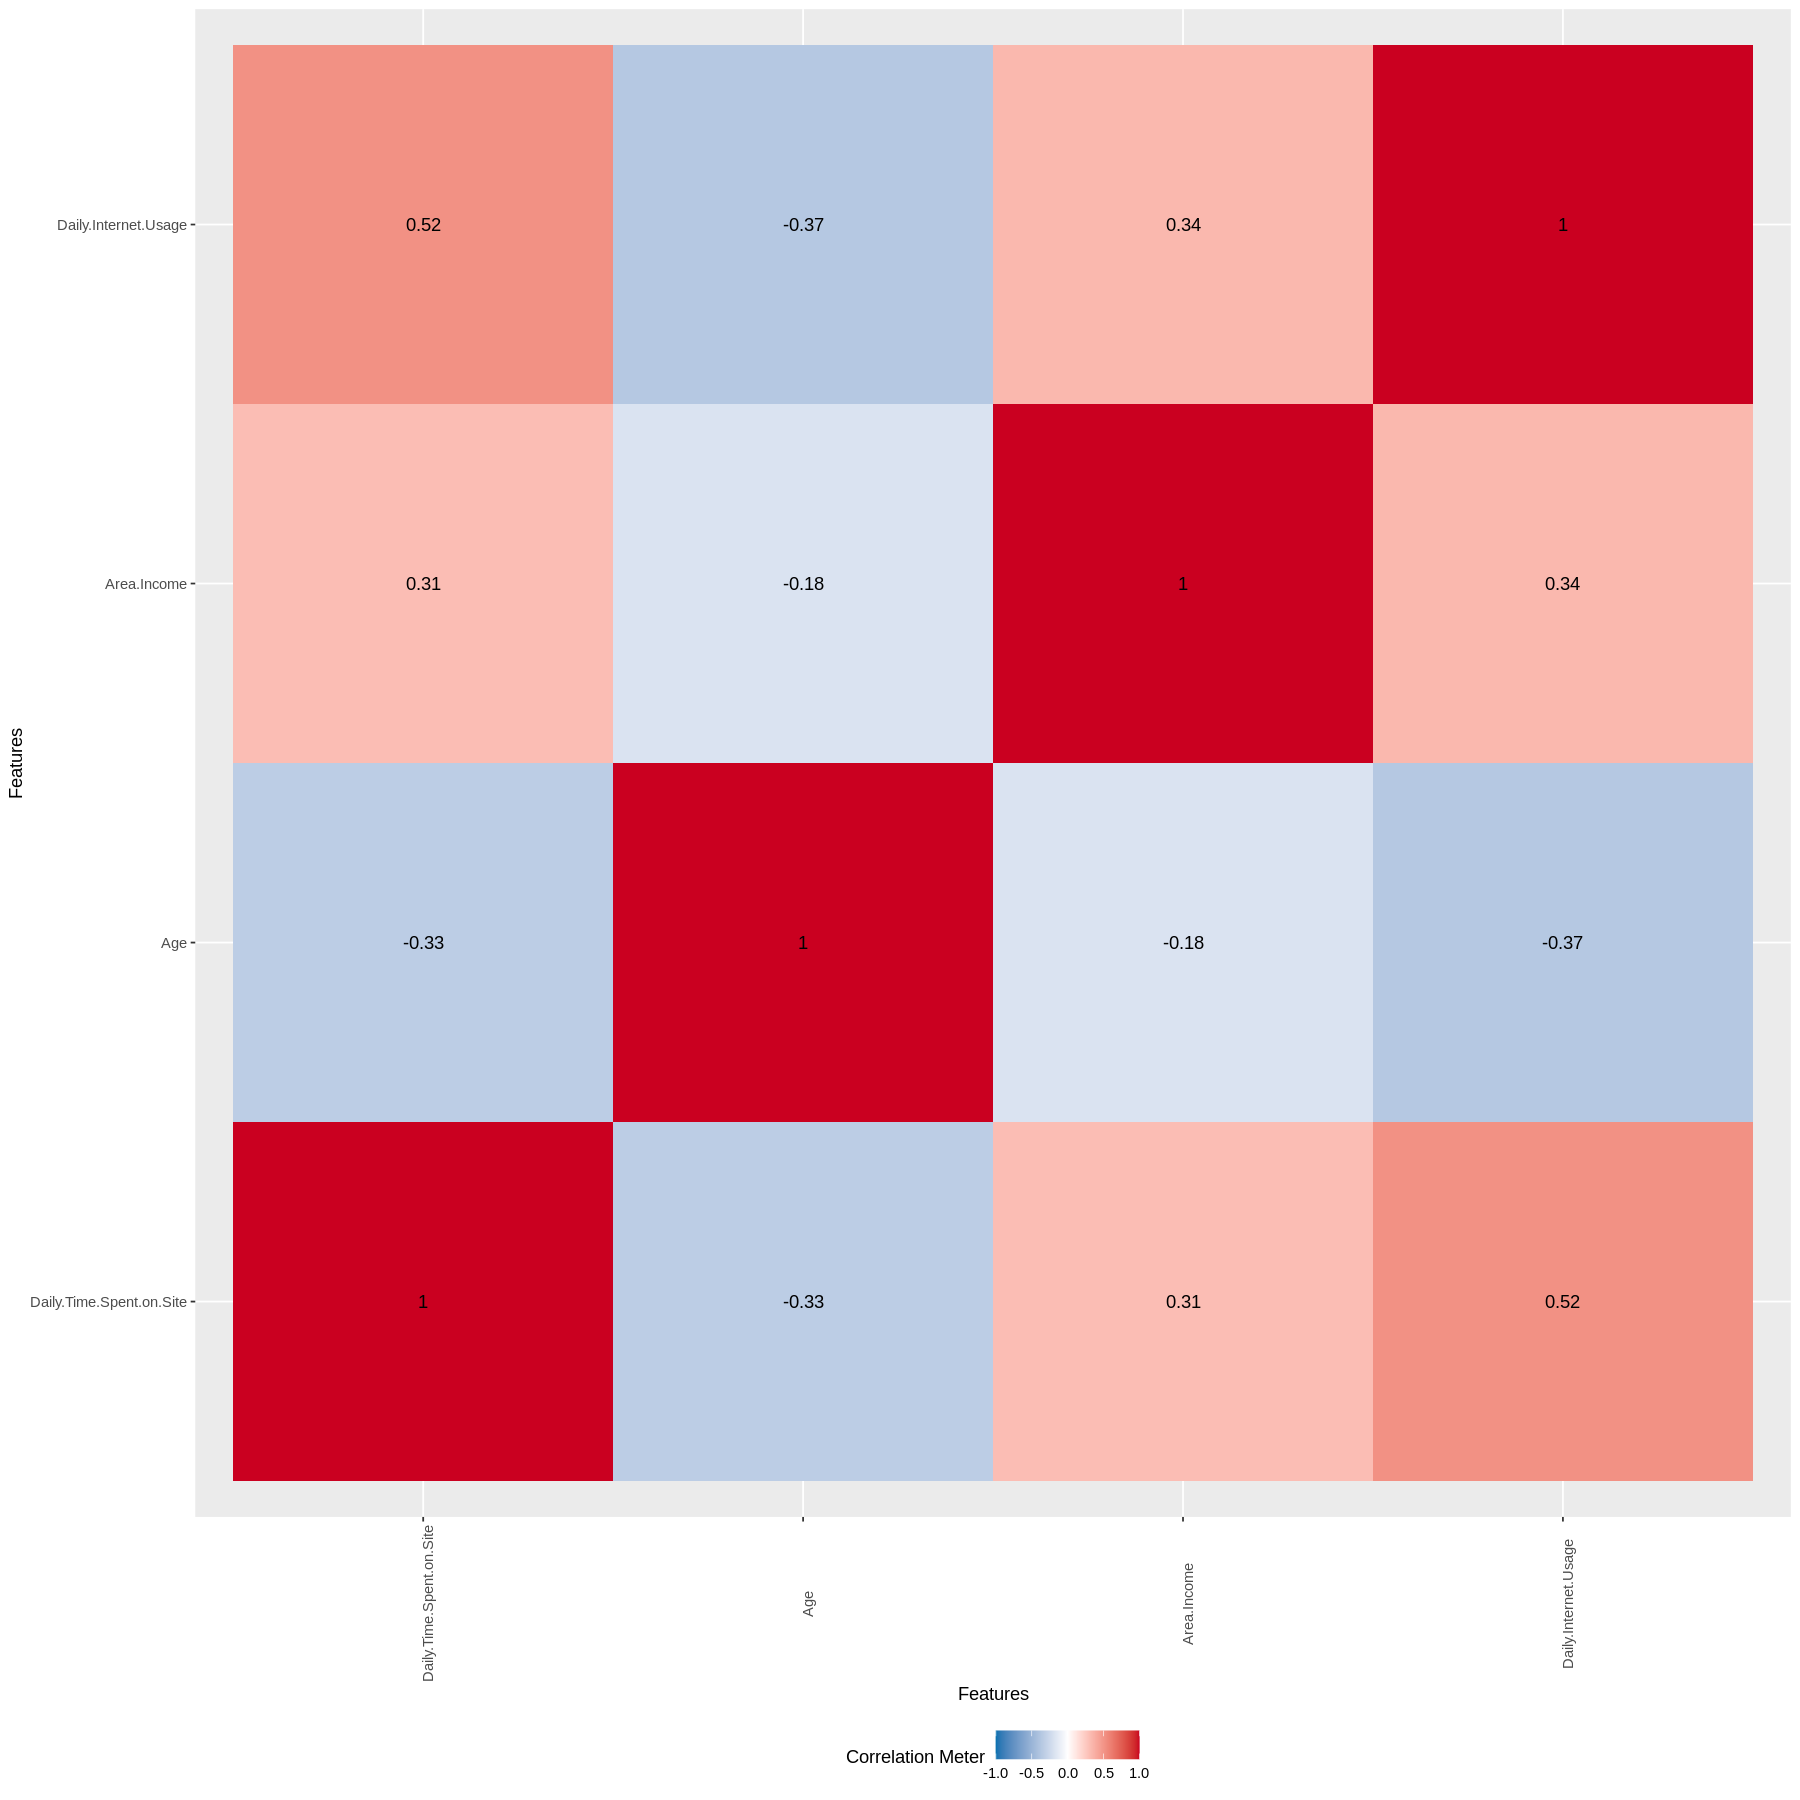

In [28]:
# Corelattion Plot
options(repr.plot.width = 15, repr.plot.height = 15)
plot_correlation(ads, type = 'c',cor_args = list( 'use' = 'complete.obs'))

## Random Forest

In [29]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




In [30]:
install.packages("randomForest")
library(randomForest)
install.packages("earth")
library(earth)
library(magrittr)
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos


Attaching package: ‘TeachingDemos’


The following objects are masked from ‘package:Hmisc’:

    cnvrt.coords, subplot



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute




In [31]:
#Datatypes
sapply(ads, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "integer"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Gender
[1] "factor"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "factor"

In [32]:
# Changing column names to lower and replacing spaces with an underscore for readability and easy reference
colnames(ads) = tolower(str_replace_all(colnames(ads), c(' ' = '_')))

# Checking whether the column names have been renames appriopriately
print(colnames(ads))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "gender"                   "country"                 
 [9] "timestamp"                "clicked_on_ad"           


In [33]:
# Split the data into training and test set
set.seed(233)
training.samples <- ads$clicked_on_ad %>% 
  createDataPartition(p = 0.8, list = FALSE)
trainSet <- ads[training.samples, ]
testSet <- ads[-training.samples, ]

In [34]:
set.seed(210)

# Train the model using rf
model =randomForest(clicked_on_ad ~ ., data=trainSet, ntree=1000)
model


Call:
 randomForest(formula = clicked_on_ad ~ ., data = trainSet, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.38%
Confusion matrix:
    0   1 class.error
0 390  10      0.0250
1  17 383      0.0425

,MeanDecreaseGini
daily_time_spent_on_site,123.3285889
age,40.5270195
area_income,34.4978378
daily_internet_usage,175.9861995
ad_topic_line,6.9723126
city,5.8083277
gender,0.8211028
country,5.7489648
timestamp,5.8159614


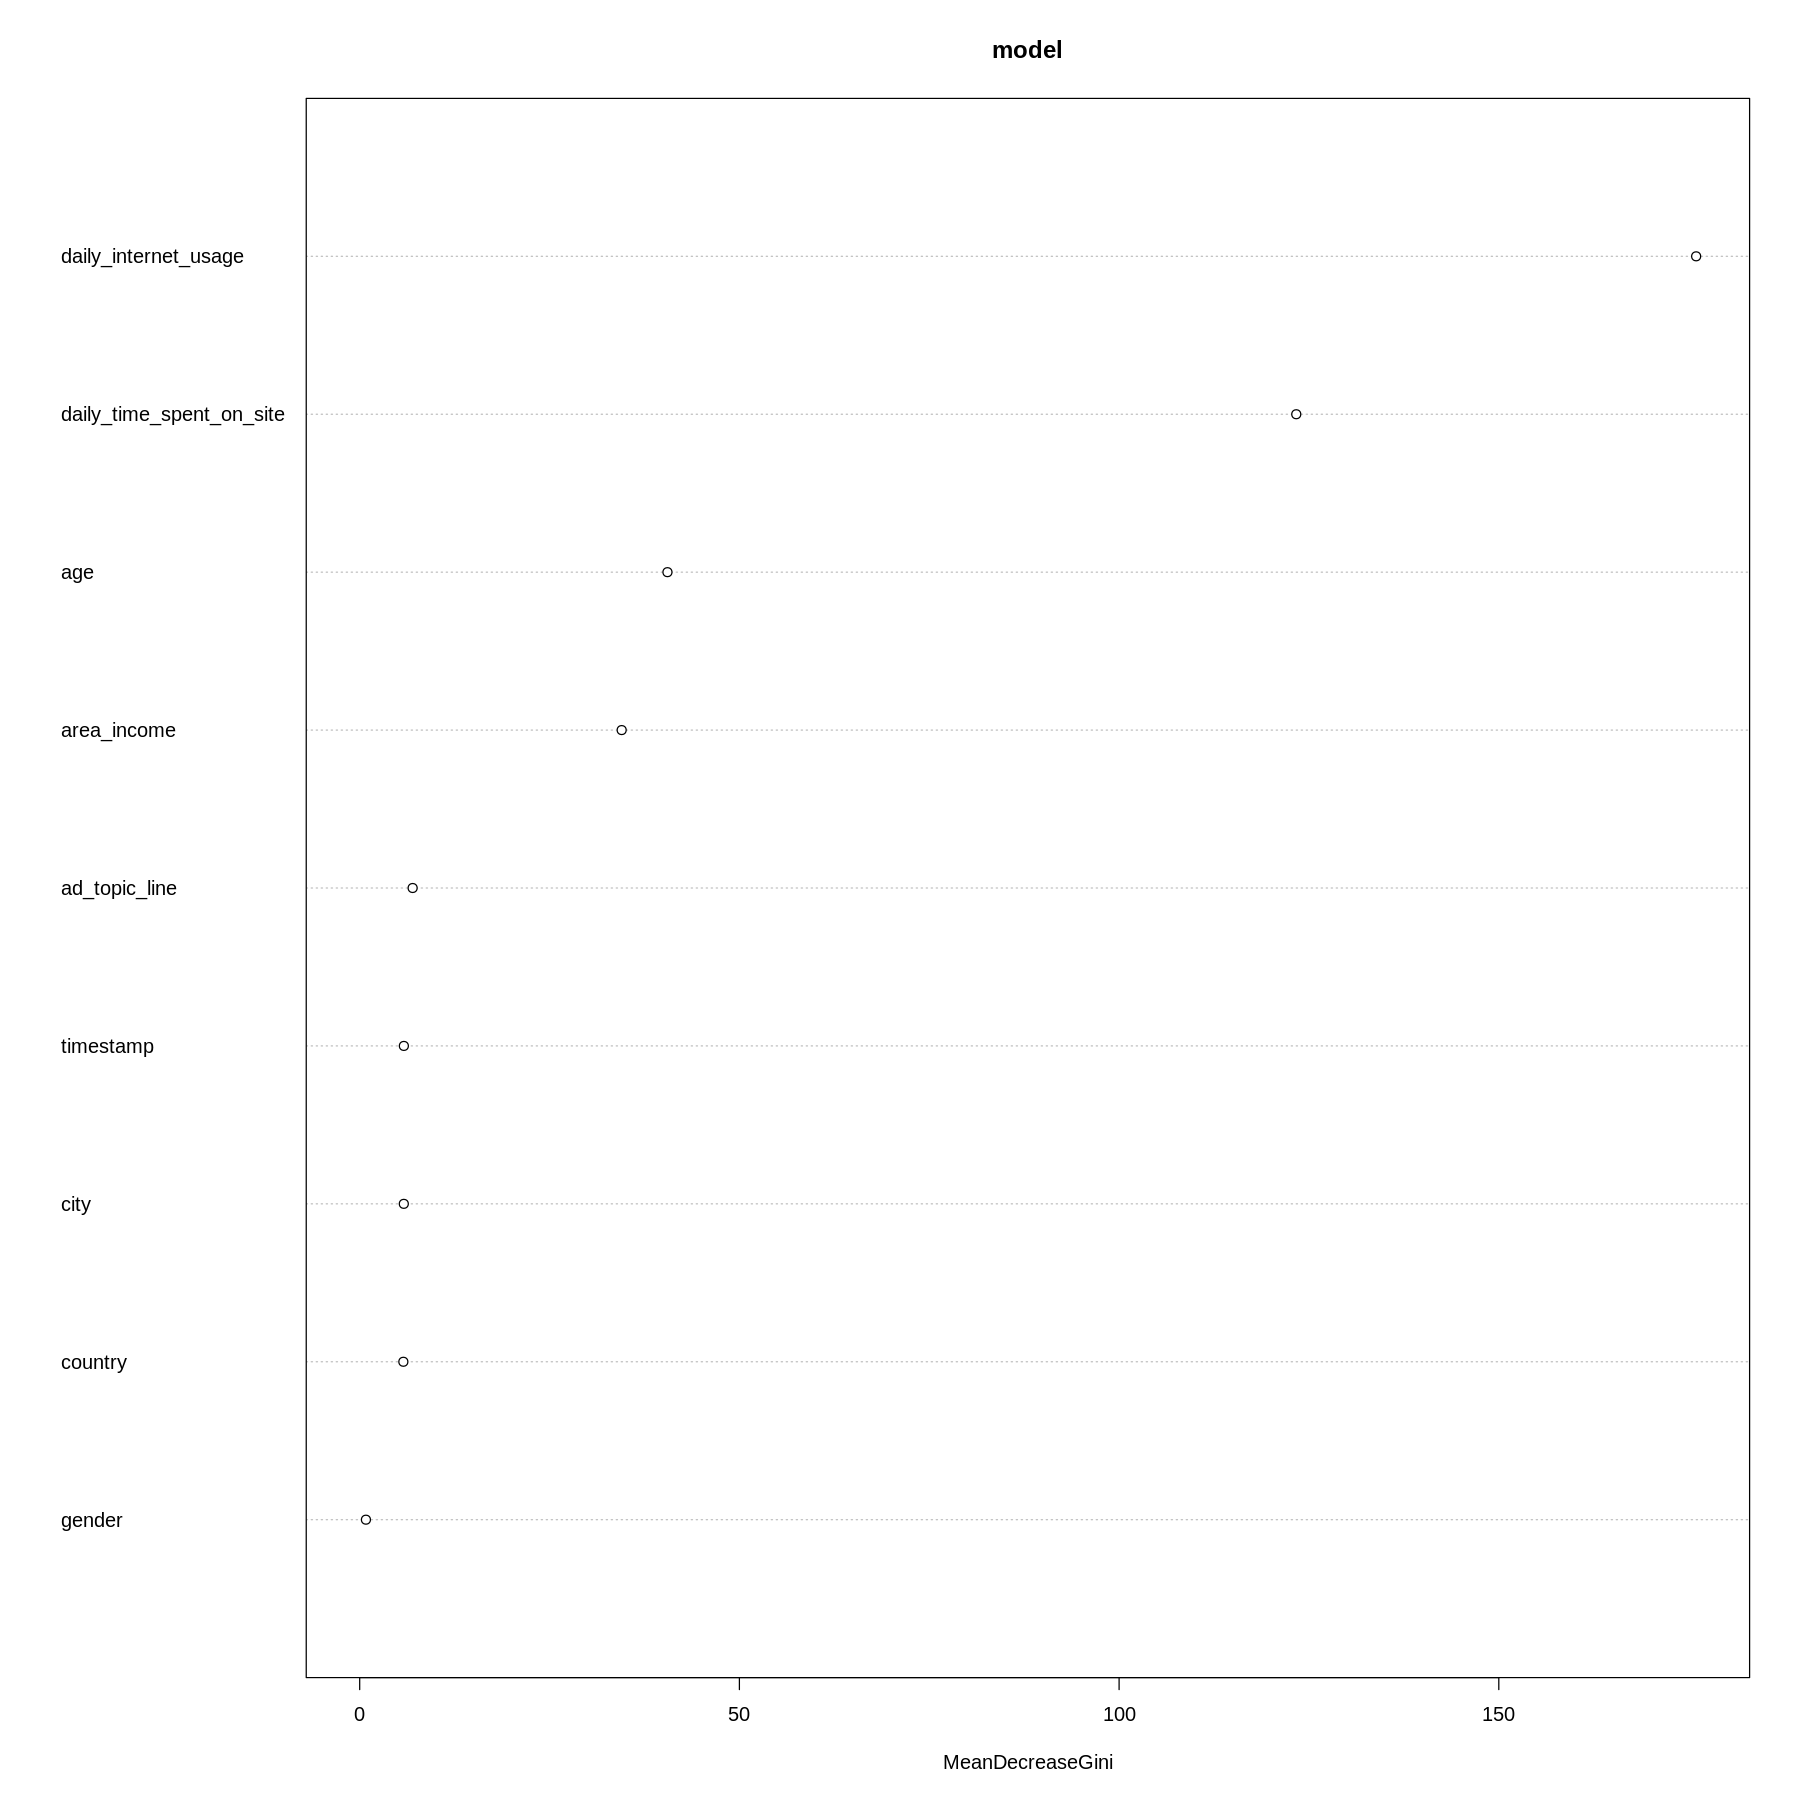

In [35]:
#Evaluate variable importance
importance(model)
varImpPlot(model)

In [36]:
predict(model, newdata= ads)

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   0    0    0    0    0    0    0    1    0    0    1    0    1    0    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    0    1    1    0    0    1    0    1    0    1    1    1    0    0    0 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    1    0    1    0    1    1    0    0    0    0    0    1    0    0 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    0    0    1    1    1    0    1    1    0    1    0    0    0    0 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    0    1    1    0    1    1    0    1    1    1    0    1    0    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   0    0    1    1    0    1    0    1    1    1    1    1    0    1    1    0 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   1    1    1    0    1    0    0    0    0    0    0    1    1    0    1    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   0    1    0    0    1    1    1    1    0    1    0    1    1    0    1    0 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   0    0    1    1    1    0    1    1    1    1    0    0    0    1    1    0 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   0    1    1    1    1    1    1    0    1    0    0    0    1    1    0    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   0    0    0    0    1    1    1    0    1    0    1    0    0    0    1    0 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    0    1    0    1    1    1    0    0    1    1    0    1    1    1    1 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   1    1    0    1    1    0    0    0    0    0    1    0    0    1    0    0 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    1    0    1    0    1    0    1    1    1    1    1    0    0    1    1 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    1    1    1    0    0    0    1    1    1    1    1    1    0    1    0 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   1    1    0    0    0    0    1    1    1    1    0    1    0    1    1    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    1    0    1    0    1    1    1    0    1    1    0    1    0    1    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   0    0    0    1    0    0    0    0    1    1    1    0    1    0    1    0 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   1    1    1    0    1    0    0    0    0    0    0    0    0    1    1    1 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   1    1    0    0    0    1    0    0    0    0    0    1    0    0    0    1 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   1    0    0    0    0    1    1    0    0    1    0    0    1    0    0    1 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    0    0    0    1    1    0    0    1    0    0    1    0    0    0    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   0    0    1    0    1    1    1    0    1    1    0    1    0    1    0    0 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   0    0    1    1    0    1    0    0    0    1    1    0    0    1    0    0 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   1    0    0    1    0    1    0

In [37]:
prediction <-predict(model, testSet)

In [38]:
confusionMatrix(prediction, testSet$clicked_on_ad)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97  4
         1  3 96
                                          
               Accuracy : 0.965           
                 95% CI : (0.9292, 0.9858)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.93            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9700          
            Specificity : 0.9600          
         Pos Pred Value : 0.9604          
         Neg Pred Value : 0.9697          
             Prevalence : 0.5000          
         Detection Rate : 0.4850          
   Detection Prevalence : 0.5050          
      Balanced Accuracy : 0.9650          
                                          
       'Positive' Class : 0               
                                    

In [39]:
trainControl(method = "cv", number = n, search ="grid")

$method
[1] "cv"

$number
function () 
{
    length(peek_mask("n()")$current_rows())
}
<bytecode: 0x561f715430a8>
<environment: namespace:dplyr>

$repeats
[1] NA

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<bytecode: 0x561f6dfab3f0>
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1] FALSE

$allowParallel
[1] TRUE

In [40]:
# Define the control
trainControl <- trainControl(method = "cv",
    number = 5,
    search = "grid")

In [42]:
model_2 = train(clicked_on_ad ~ ., data=trainSet, method='rf', tuneLength = 5, metric='Accuracy', trainControl = trainControl)
model_2

# Predict the test data and computing the confusion matrix
prediction_2 <- predict(model_2, testSet)
confusionMatrix(prediction_2, testSet$clicked_on_ad)

# Decision trees


In [43]:
install.packages("ranger")
library(ranger)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [44]:
# Training the model
model_3 <- train(clicked_on_ad ~ .,
               data = trainSet,
               method = "ranger",
               tuneLength = 5)

Growing trees.. Progress: 95%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 92%. Estimated remaining time: 2 seconds.
Growing trees.. Progress: 82%. Estimated remaining time: 6 seconds.
Growing trees.. Progress: 85%. Estimated remaining time: 5 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 3 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 85%. Estimated remaining time: 5 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 12 seconds.
Growing trees.. Progress: 83%. Estimated remaining time: 6 seconds.
Growing trees.. Progress: 73%. Estimated remaining time: 11 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 3 seconds.
Growing trees.. Progress: 84%. Estimated remaining time: 5 seconds.
Growing trees.. Progress: 79%. Estimated remaining time: 8 seconds.
Growing trees.. Progress: 88%. Estimated remai

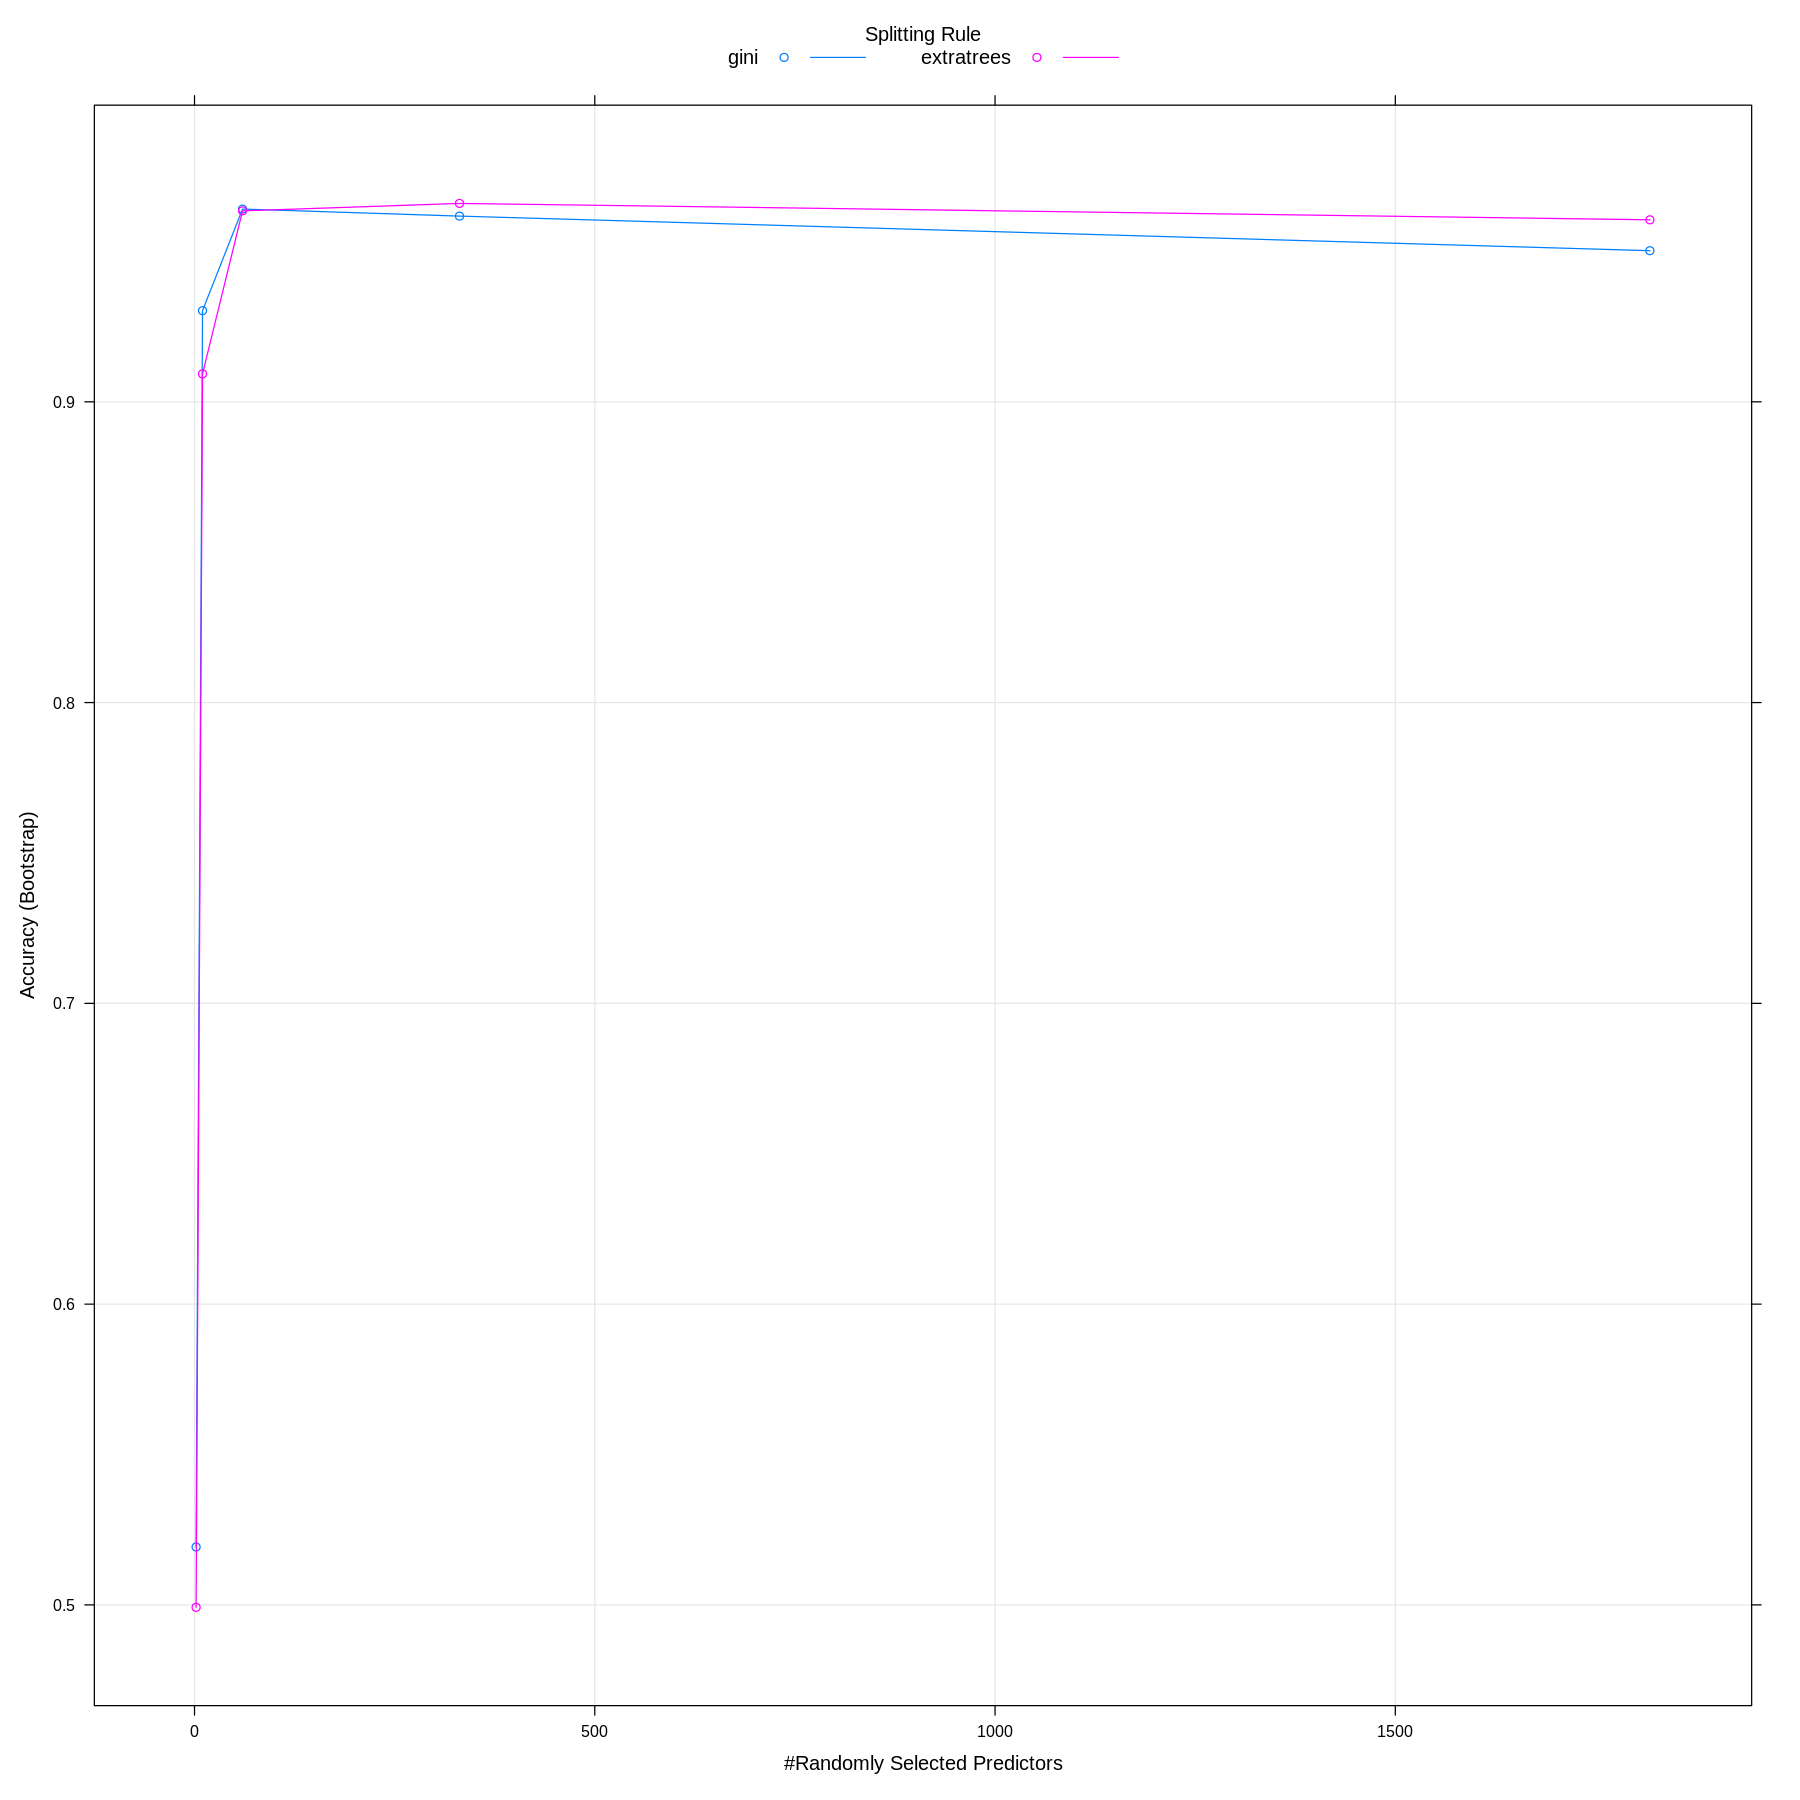

In [45]:
# Plotting the model
plot(model_3)

Accuracies for the random forests and decision trees is about 96%

### Follow up questions
> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

### a). Did we have the right data?
> Yes we did

### b). Do we need other data to answer our question?
> At this point I believe if we had more data from the site it would help alot in clarifying some aspects like if the ads clicked are usually 50/50 or not.

### c). Did we have the right question?

> Yes.

### Conclusions and Recommendations
> There is a fair distribution of the genders accessing the website, with 0 standing at 51.9% and 1 48.1%, not so biased.
> On daily time spent on the site , 32.60 is the min time spent, 65 mins makes the average and most time spent on the blog is 91 mins.
> Age distribution of individuals accessing the site is quite reasonable with the min being 19 to 23 years of age and max 57 to 61, the avarage age of a blog visitor is 36 years.
> Income has an average of 55,000. Despite there being some outliers in income it was not reasonable to drop them since every one earns a unique amount. 40k to around 70k being the most popular. This says alot about the type of individuals who read her blogs.
> Internet usage ranged between 104.8 to 270 units with an average of 180.
> Ages 20's to late 40's have high numbers.
> People earning around 20k to 60k spending roughly 40 to 60 mins on the site are most likely to click on an ad.
> People aged 25 to 60 are most likely to click on an ad if they spend 30 to 60 mins at most on the site.
> It is evident that time spent has negative corelation with clicked ads showing that the more time spent on the internet, the less the clicked adds.
### Reccomendations

> The ads posted on her site should be more relevant to this demographic between late twenties and early forties.
> Also focus on having relevant ads in the first 60 mins of a person visiting the site also making sure not to overcrowd the ads.